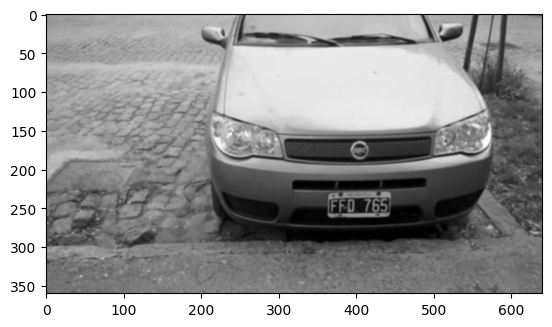

In [28]:
import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt 

IMG_DIR = "images/Patentes"
PLATE_IMG_NAMES = os.listdir(IMG_DIR)

plate_data = {
    "rect_ext" : (29.4, 12.9),
    "rect_int" : (28.3, 7.8 ),
    "letter" : (3.2, 6.7),
    "separator" : 9
}

plate_imgs = []

for f in PLATE_IMG_NAMES:
    img = cv2.imread( IMG_DIR + "/" + f )
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_blur_img = cv2.GaussianBlur(img_gray, ksize=(3, 3), sigmaX=1, sigmaY=1)
    plate_imgs.append( {
        "img":img,
        "img_gray": img_gray,
        "img_blur": img_blur_img
    } )


plt.imshow(plate_imgs[0]["img_blur"], cmap="gray")


In [29]:
def plot_images(imgs: list, n_cols=3, cmap: str  = "gray" , fsize=(50,50), sharex=True, sharey=True):

    n_rows=int( round(len(plate_imgs)/n_cols) )
    fig,axs = plt.subplots(n_cols,n_rows, figsize=fsize, sharex=sharex, sharey=sharey)
    i=0
    for c in range(0, n_cols):
        for r in range(0,n_rows):
            if c*r > len(imgs):
                break 
            else:
                axs[c,r].imshow(imgs[i], cmap=cmap)
                i+=1

In [30]:
def detect_plates(imgs: list, kernel_size: tuple = (13,5), m_iter: int = 1,  morph : int = cv2.MORPH_RECT, clt: int =180, cmt: int =300, cas: int = 3, cl2gradient=False ):
    kernel = cv2.getStructuringElement(morph,kernel_size)

    morph_imgs = []
    canny_imgs=[]
    plates_coords = []

    for img in imgs:
        blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel, iterations=m_iter)
        #tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel, iterations=m_iter) 
        canny_img =cv2.Canny(blackhat, clt, cmt, apertureSize=cas, L2gradient=cl2gradient)
        morph_imgs.append(blackhat)
        canny_imgs.append(canny_img)
    
    return morph_imgs, canny_imgs,plates_coords
    

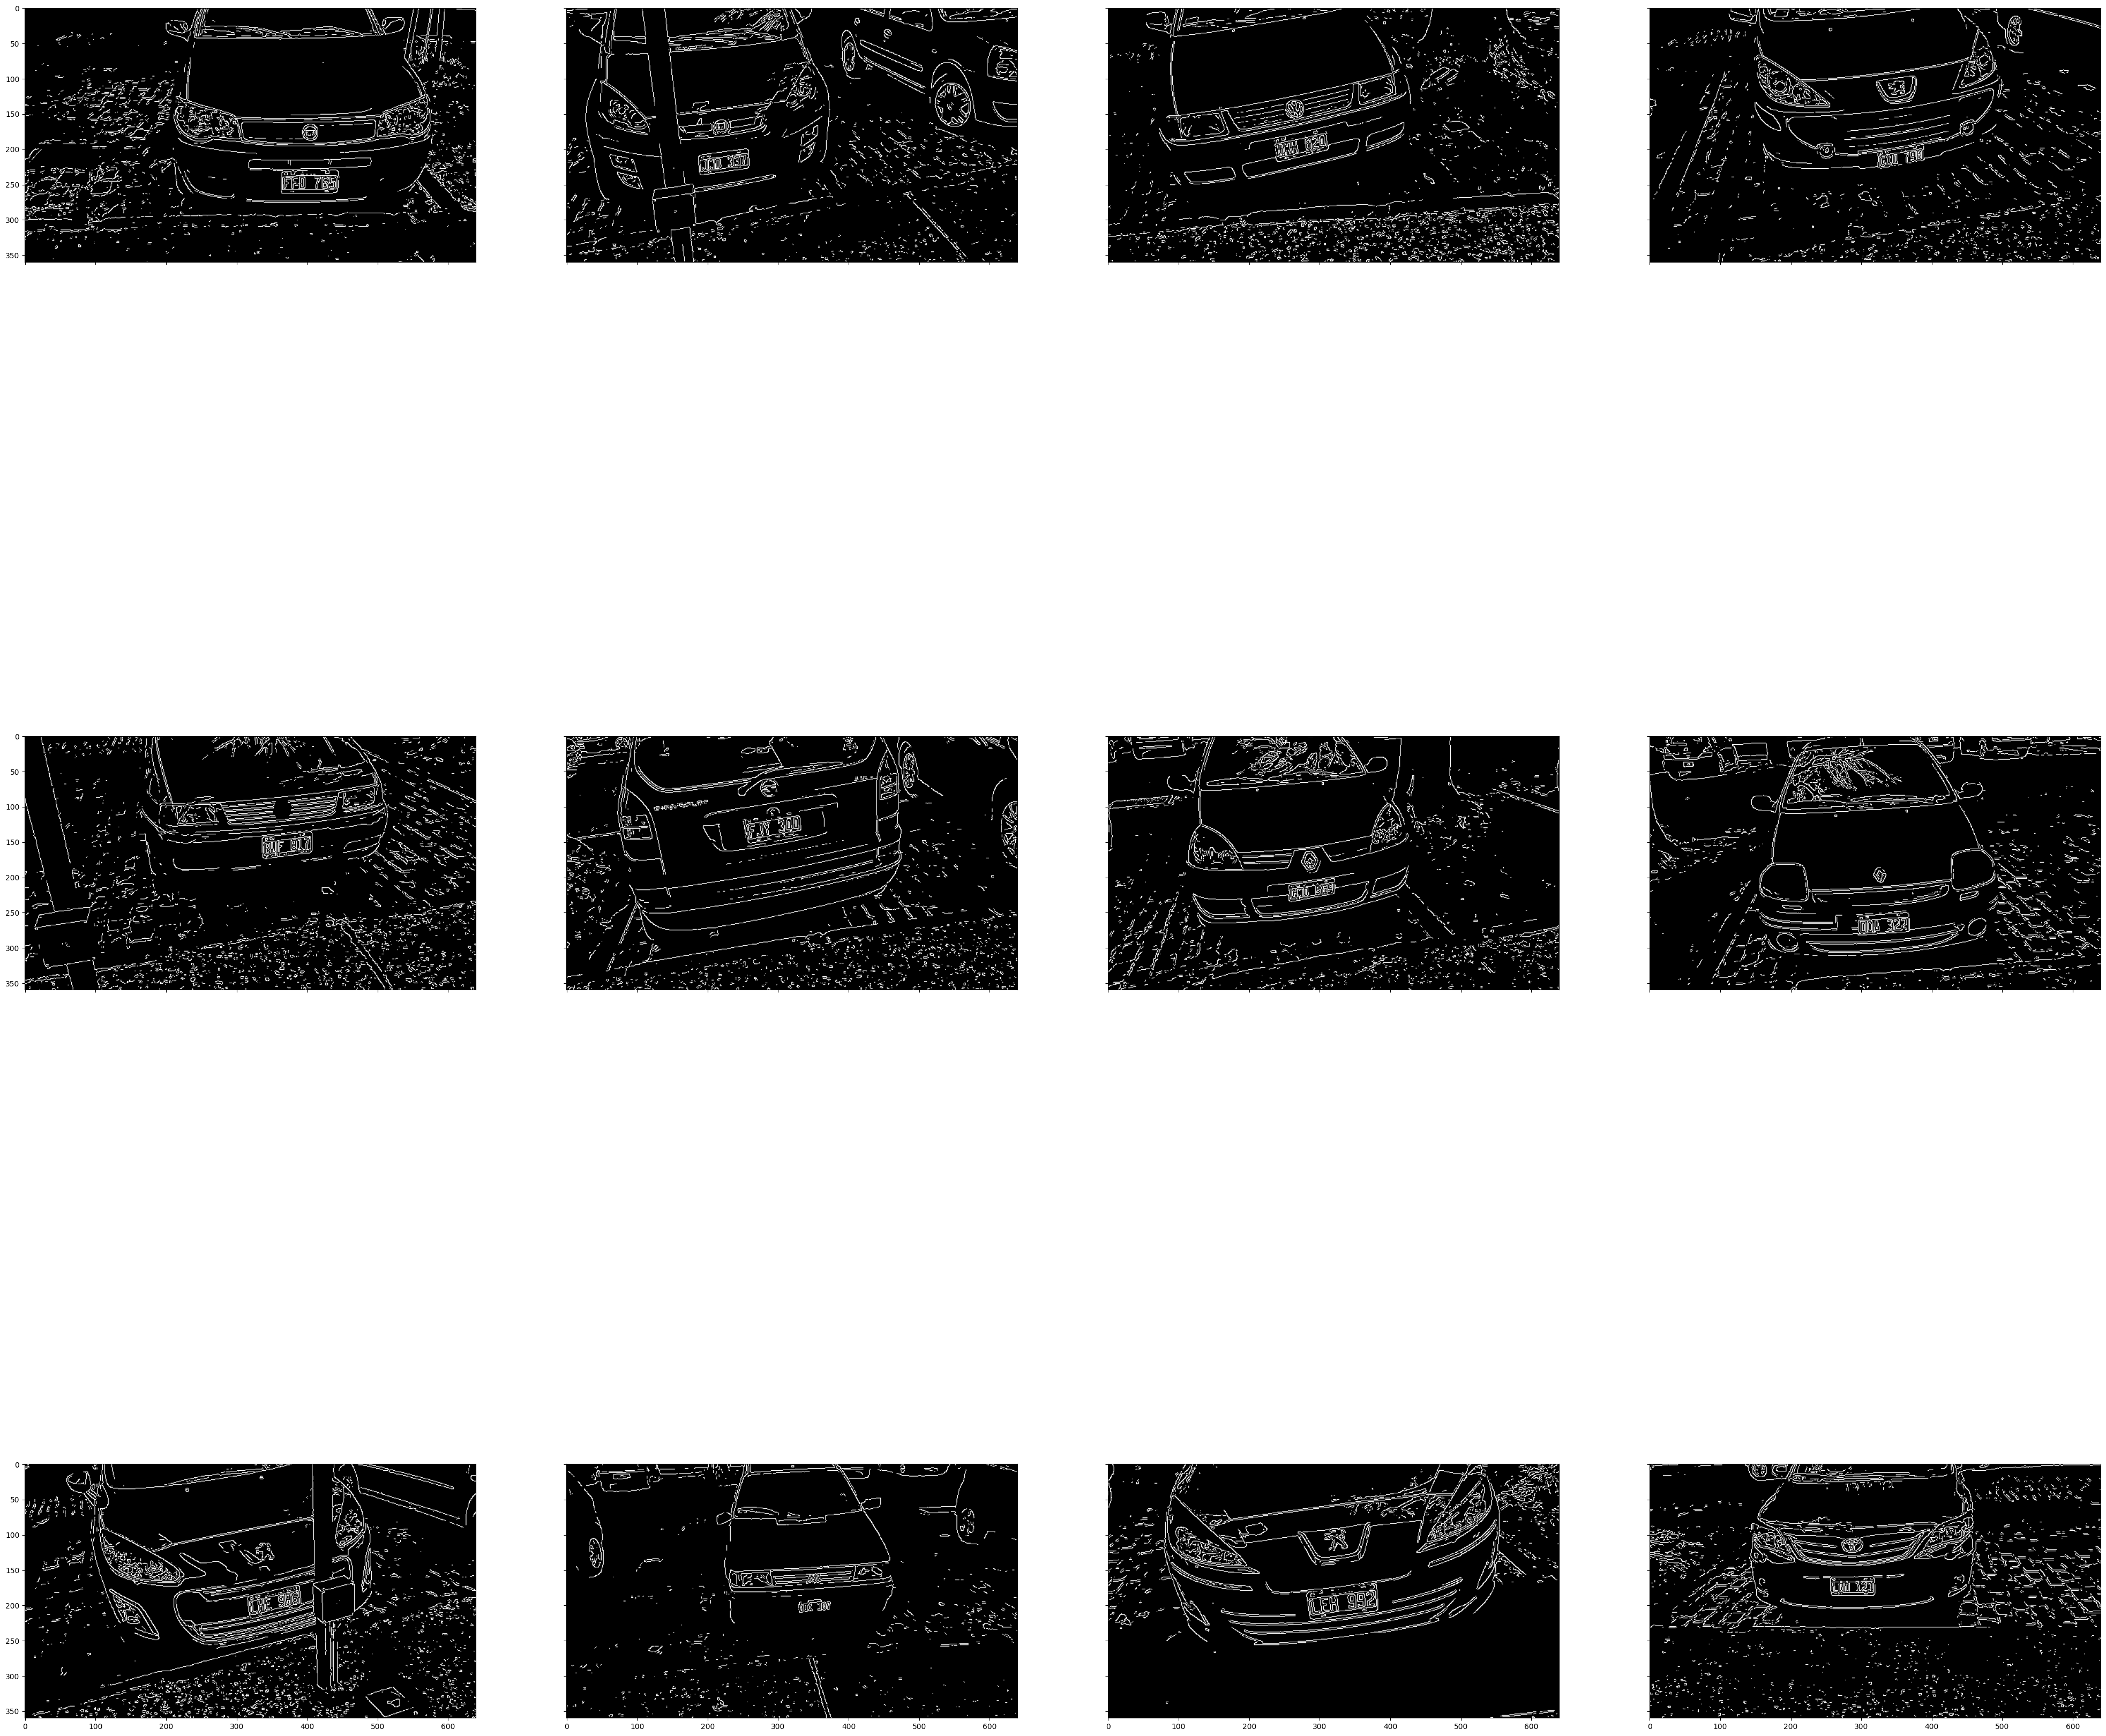

In [4]:

blur_gray_imgs=[ img["img_gray"] for img in plate_imgs ]

morph, canny, coords = detect_plates(blur_gray_imgs, kernel_size=(13,5), clt=180, cmt=200,m_iter=100)

#plot_images(morph)
plot_images(canny)

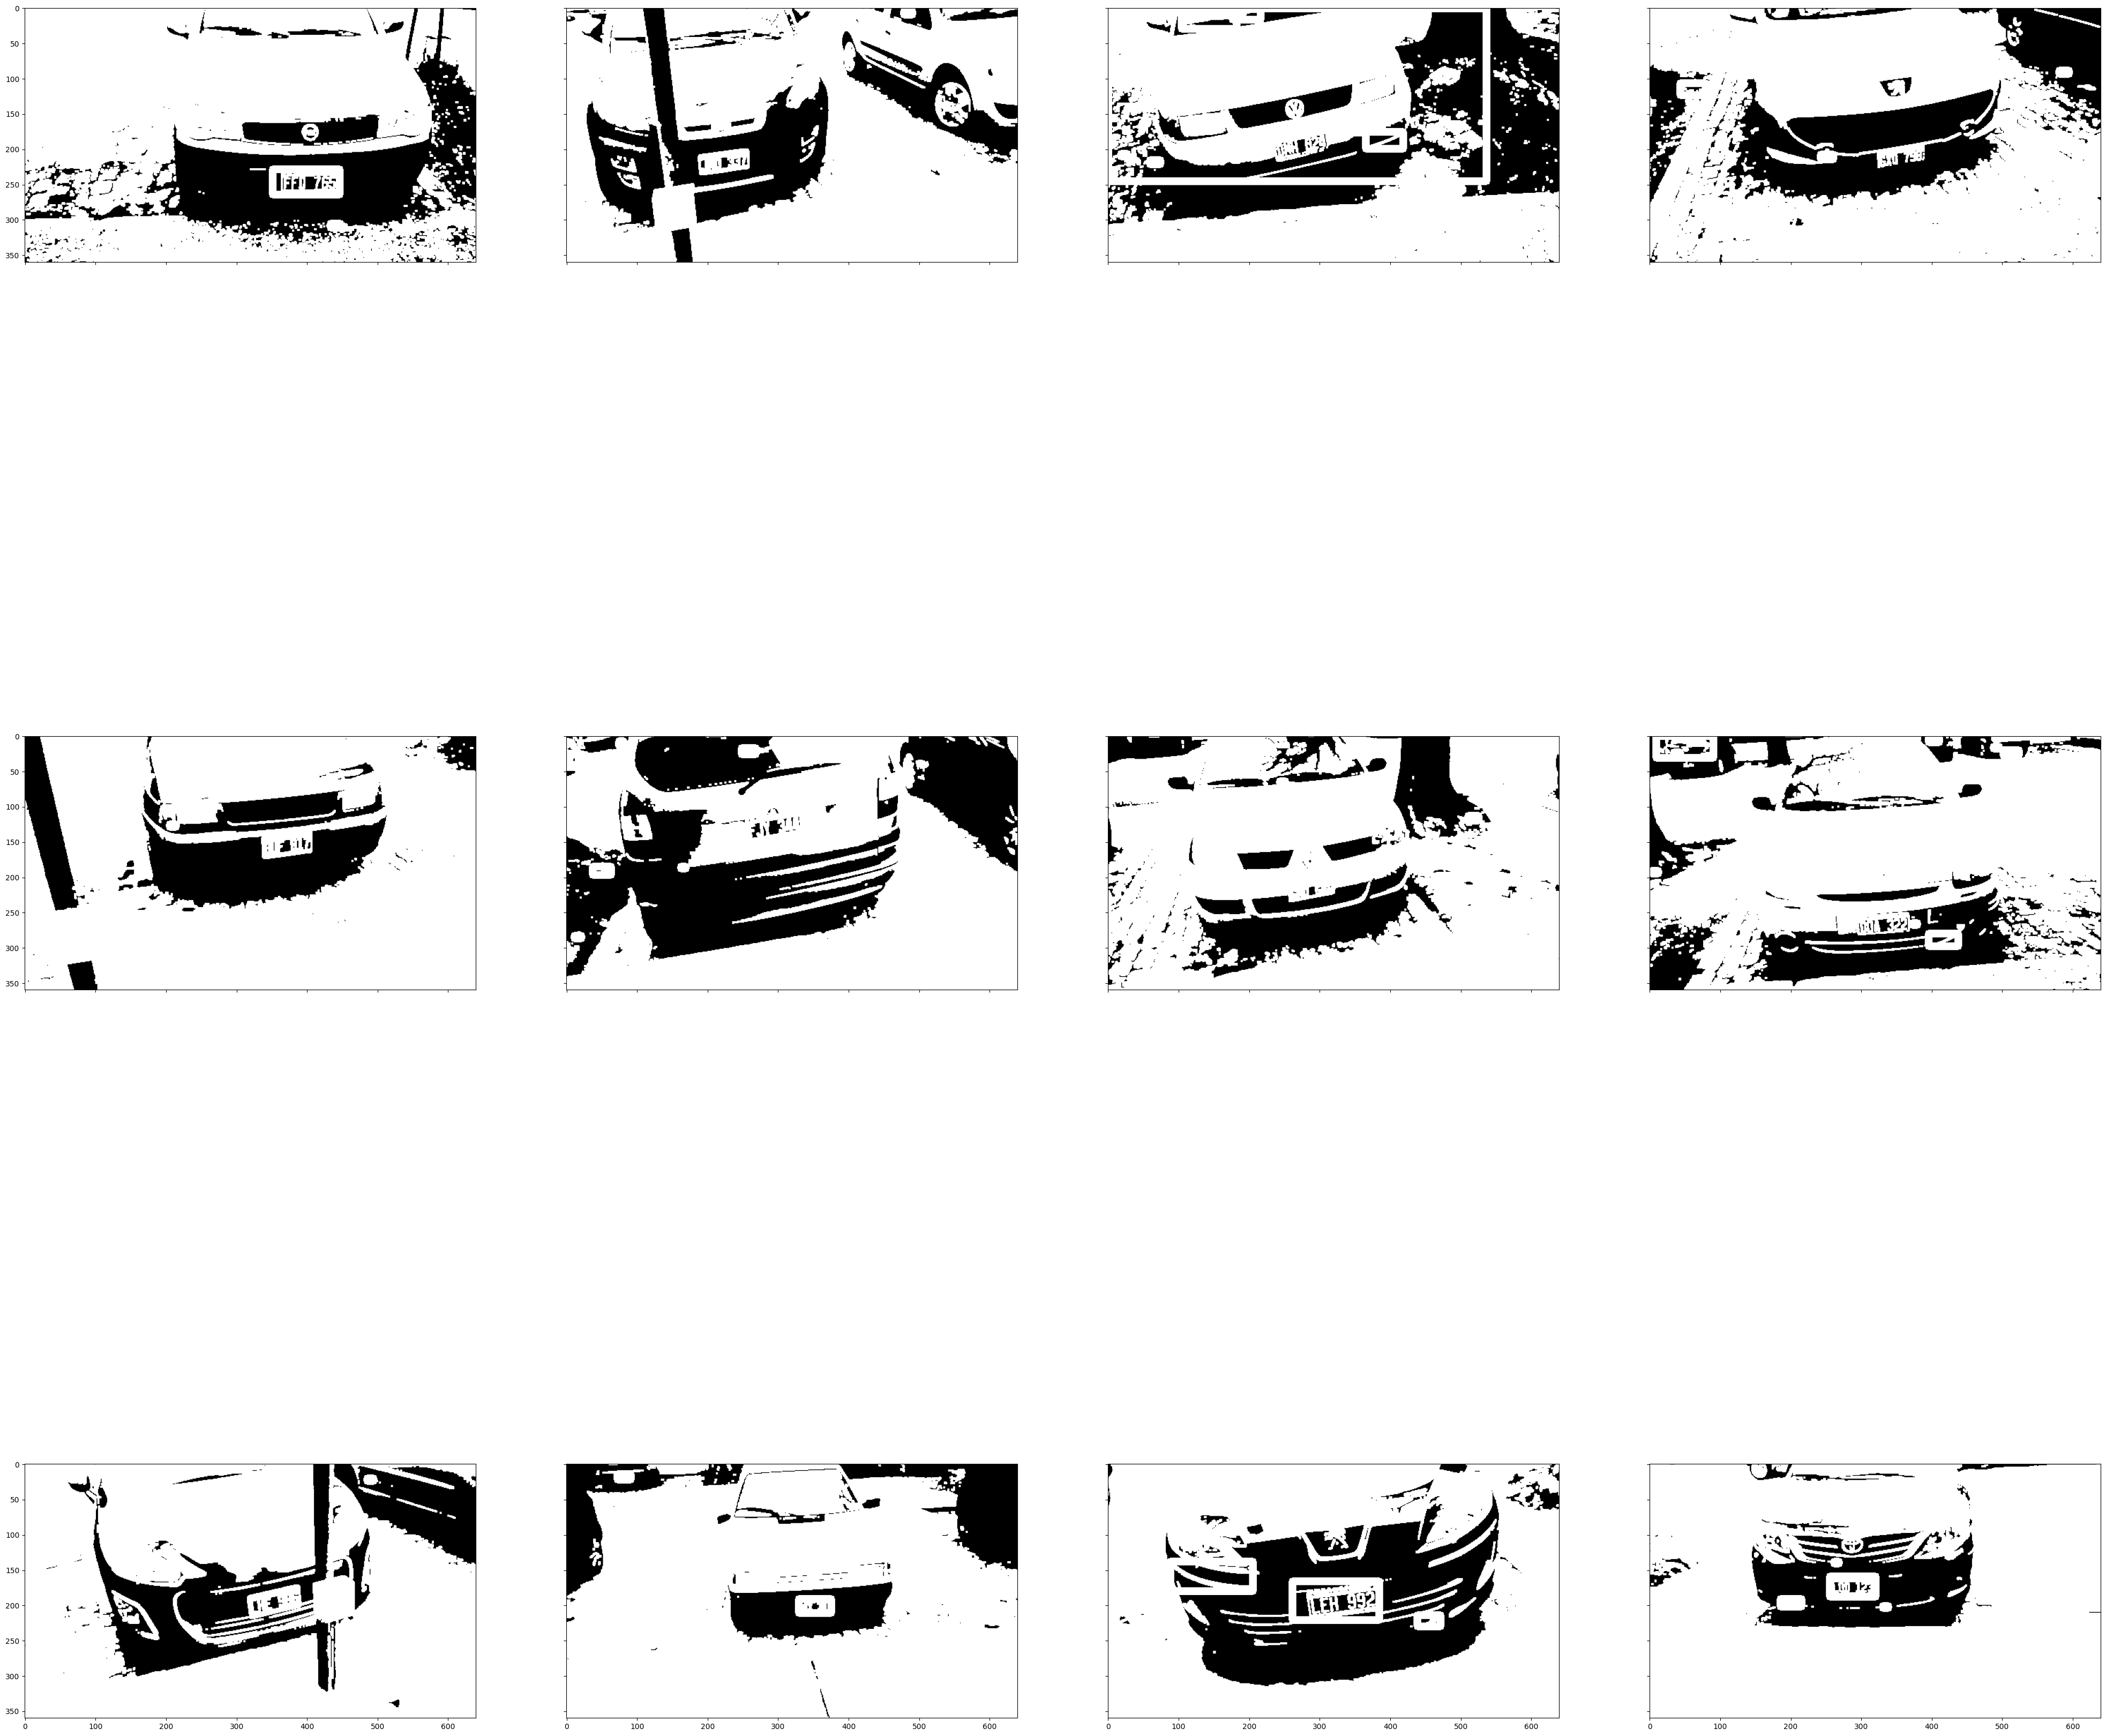

In [56]:
# r = []
# for q in morph:
#     k = cv2.getStructuringElement(cv2.MORPH_RECT,(11,5))
#     (T, threshInv) = cv2.threshold(q, 100, 255, cv2.THRESH_BINARY)

#     n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(threshInv, connectivity=8)

#     for i in range(1, n_labels):
#         x1 = stats[i, cv2.CC_STAT_LEFT] 
#         y1 = stats[i, cv2.CC_STAT_TOP] 
#         w = stats[i, cv2.CC_STAT_WIDTH] 
#         h = stats[i, cv2.CC_STAT_HEIGHT]        
#         p1 = (x1,y1)
#         p2 = (x1+w, y1+h)
#         q = cv2.rectangle( threshInv, p1, p2, (0,255,0), thickness=1)
#     r.append( q )

# plot_images(r)

k2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
b = []
for s in morph:
    t,s = cv2.threshold(s, 140, 255, cv2.THRESH_BINARY_INV)
    #v = cv2.morphologyEx(s, cv2.MORPH_CLOSE, k2, iterations=1)
    #v = cv2.morphologyEx(s, cv2.MORPH_OPEN, k2, iterations=1)
    #s= cv2.dilate(s, cv2.getStructuringElement(cv2.MORPH_RECT,(7,3)), iterations=1)
    #n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(s, connectivity=4)
    # s = cv2.Canny(s, 200, 255, apertureSize=3, L2gradient=True)
    # s = cv2.morphologyEx(s, cv2.MORPH_CLOSE, k2, iterations=1)
    v = cv2.dilate(s, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)), iterations=1)
    #contours, new = cv2.findContours(s, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #cv2.drawContours(v, contours, -1, (255, 0, 0), 3)

    #v =s
    #v = cv2.erode(s, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)), iterations=2)
    #v=s
    # s = ~s
    f =  np.zeros_like(s, np.uint8) 

    n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(v, connectivity=4)

    for i in range(1, n_labels):
        x1 = stats[i, cv2.CC_STAT_LEFT] 
        y1 = stats[i, cv2.CC_STAT_TOP] 
        w = stats[i, cv2.CC_STAT_WIDTH] 
        h = stats[i, cv2.CC_STAT_HEIGHT]        
        p1 = (x1,y1)
        p2 = (x1+w, y1+h)

        proportion = ( p2[0] - p1[0])/ (p2[1]-p1[1])  
        if proportion > 2 and  proportion <=2.8 :     
            v = cv2.rectangle( v, p1, p2, (255,255,0), thickness=10)
    
    b.append(v)

    # s= cv2.dilate(s, cv2.getStructuringElement(cv2.MORPH_RECT,(5,3)), iterations=1)
    #contours, new = cv2.findContours(s, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #img1 = s.copy()
    #cv2.drawContours(f, contours, -1, (255, 0, 0), 3)
plot_images(b)